In [58]:
import requests, zipfile, io, gzip, glob, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.stats as st
%matplotlib inline
from obspy import read

In [59]:
#Read
wt = read('C:/Users/jepul/OneDrive/Escritorio/ML Geo/MLGeo-Autumn22/proyect/MLGeo-Autumn22-jepulidom54/LAB/2015-01-24-2300-06.XX_00000__001')
st = read('C:/Users/jepul/OneDrive/Escritorio/ML Geo/MLGeo-Autumn22/proyect/MLGeo-Autumn22-jepulidom54/LAB/2015-024-18-00-00.2015-025-00-00-00.ch0.mseed')
st1 = read('C:/Users/jepul/OneDrive/Escritorio/ML Geo/MLGeo-Autumn22/proyect/MLGeo-Autumn22-jepulidom54/LAB/2015-024-18-00-00.2015-025-00-00-00.ch1.mseed')
st2 = read('C:/Users/jepul/OneDrive/Escritorio/ML Geo/MLGeo-Autumn22/proyect/MLGeo-Autumn22-jepulidom54/LAB/2015-024-18-00-00.2015-025-00-00-00.ch2.mseed')
st3 = read('C:/Users/jepul/OneDrive/Escritorio/ML Geo/MLGeo-Autumn22/proyect/MLGeo-Autumn22-jepulidom54/LAB/2015-024-18-00-00.2015-025-00-00-00.ch3.mseed')

In [60]:
tr = st[0]
tr1 = st1[0]
tr2 = st2[0]
tr3 = st3[0]
print(tr)
print(tr1)
print(tr2)
print(tr3)

XX.00000..000 | 2015-01-24T18:00:00.000000Z - 2015-01-24T23:59:59.996000Z | 250.0 Hz, 5400000 samples
XX.00000..001 | 2015-01-24T18:00:00.000000Z - 2015-01-24T23:59:59.996000Z | 250.0 Hz, 5400000 samples
XX.00000..002 | 2015-01-24T18:00:00.000000Z - 2015-01-24T23:59:59.996000Z | 250.0 Hz, 5400000 samples
XX.00000..003 | 2015-01-24T18:00:00.000000Z - 2015-01-24T23:59:59.996000Z | 250.0 Hz, 5400000 samples


In [61]:
# Now let's plot the raw and filtered data...
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
t1 = np.arange(0, tr1.stats.npts / tr1.stats.sampling_rate, tr1.stats.delta)
t2 = np.arange(0, tr2.stats.npts / tr2.stats.sampling_rate, tr2.stats.delta)
t3 = np.arange(0, tr3.stats.npts / tr3.stats.sampling_rate, tr3.stats.delta)

z = np.asarray(tr[0].data)
n=tr.data
n1=tr1.data
n2=tr2.data
n3=tr3.data

print(len(n))
print(len(n1))
print(len(n2))
print(len(n3))
print(len(t))


5400000
5400000
5400000
5400000
5400000


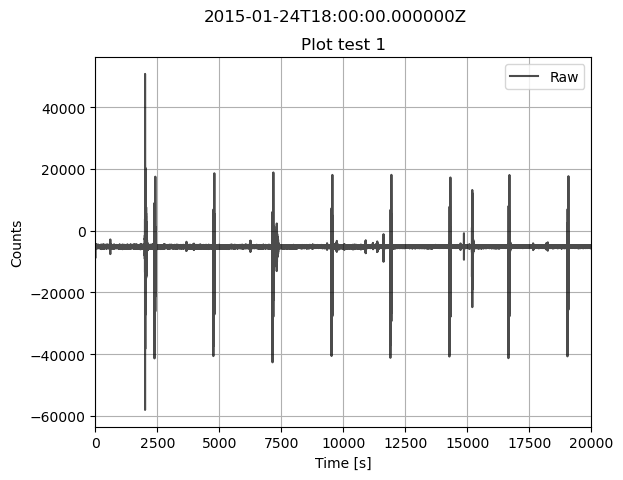

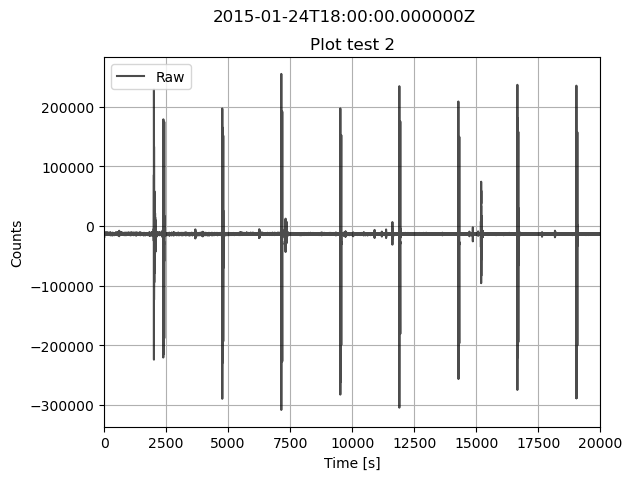

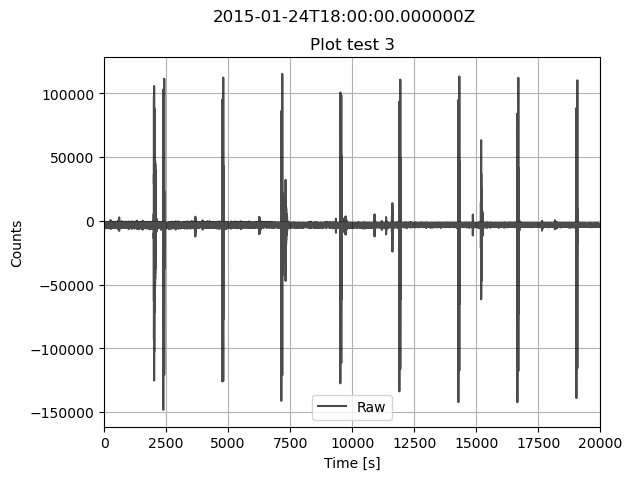

In [62]:
plt.figure(1)
plt.plot(t1, n1 ,'k', label='Raw', alpha=0.7)
plt.xlabel('Time [s]')
plt.xlim(0, 20000)
plt.suptitle(tr1.stats.starttime)
plt.grid(True)
plt.title('Plot test 1')
plt.legend()
plt.ylabel('Counts')

plt.figure(2)
plt.plot(t2, n2 ,'k', label='Raw', alpha=0.7)
plt.xlabel('Time [s]')
plt.xlim(0, 20000)
plt.suptitle(tr2.stats.starttime)
plt.grid(True)
plt.title('Plot test 2')
plt.legend()
plt.ylabel('Counts')

plt.figure(3)
plt.plot(t3, n3 ,'k', label='Raw', alpha=0.7)
plt.xlabel('Time [s]')
plt.xlim(0, 20000)
plt.suptitle(tr3.stats.starttime)
plt.grid(True)
plt.title('Plot test 3')
plt.legend()
plt.ylabel('Counts')
plt.show()

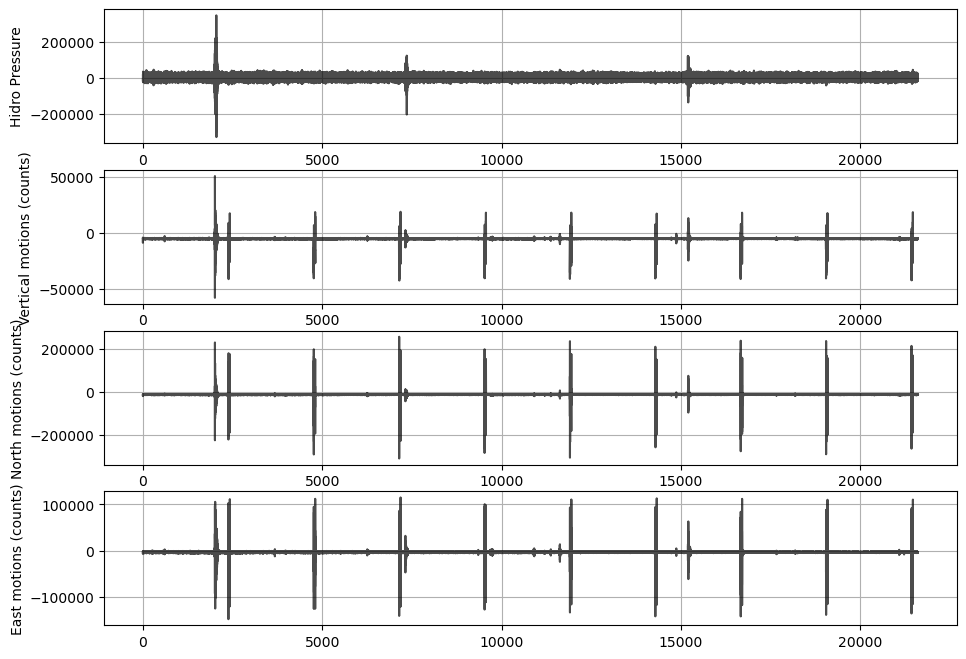

In [63]:
fig1,ax=plt.subplots(4,1,figsize=(11,8))
ax[0].plot(t, n ,'k', label='Hidro', alpha=0.7)
ax[0].set_ylabel('Hidro Pressure')
ax[0].grid(True)
ax[1].plot(t1, n1 ,'k', label='Raw1', alpha=0.7)
ax[1].set_ylabel('Vertical motions (counts)')
ax[1].grid(True)
ax[2].plot(t2, n2 ,'k', label='Raw2', alpha=0.7)
ax[2].set_ylabel('North motions (counts)')
ax[2].grid(True)
ax[3].plot(t3, n3 ,'k', label='Raw3', alpha=0.7)
ax[3].set_ylabel('East motions (counts)')
ax[3].grid(True)

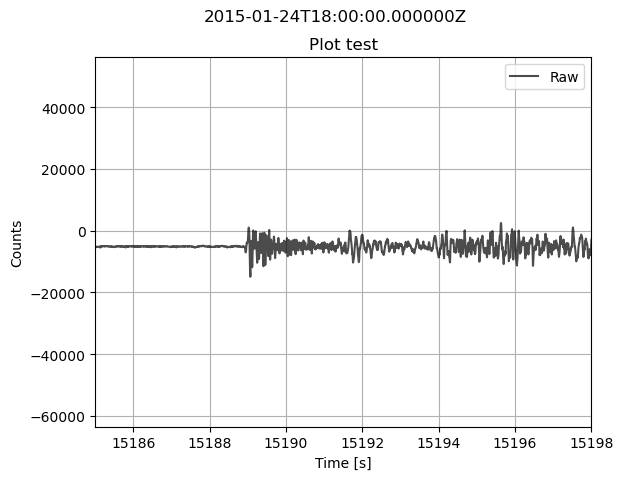

In [64]:
plt.plot(t, n1 ,'k', label='Raw', alpha=0.7)
plt.xlabel('Time [s]')
plt.xlim(15185, 15198)
plt.suptitle(tr.stats.starttime)
plt.grid(True)
plt.title('Plot test')
plt.legend()
plt.ylabel('Counts')
plt.show()

In [65]:
def raw_moment(X, k, c=0):
    return ((X - c)**k).mean()

def central_moment(X, k):
    return raw_moment(X=X, k=k, c=X.mean())

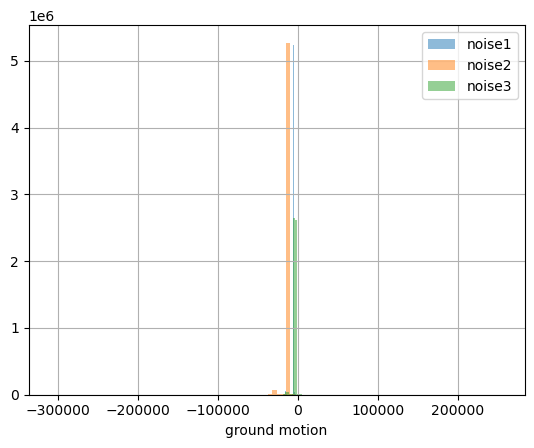

In [66]:
# type below
pt1=plt.hist(n1,100,alpha=0.5,label='noise1');
pt2=plt.hist(n2,100,alpha=0.5,label='noise2');
pt2=plt.hist(n3,100,alpha=0.5,label='noise3');
plt.legend();
plt.grid(True);
plt.xlabel('ground motion');
plt.show()

In [67]:
# the mean:
print(raw_moment(n,1))
# the variance:
print(central_moment(n,2))
# the skewness
print(central_moment(n,3)/central_moment(n,2)**(3/2))
# the kurtosis
print(central_moment(n,4)/central_moment(n,2)**2)

2488.537102222222
82973852.76314664
-0.062084283464129315
28.48204485112119


In [68]:
# Stadistic Variation ?
print('for n the mean is %4.2f, the variance is %4.2f, the skewness is %4.2f, the kurtosis is %4.2f'
 %(np.mean(n),np.std(n)**2,scipy.stats.skew(n),scipy.stats.kurtosis(n)))
print('for n1 the mean is %4.2f, the variance is %4.2f, the skewness is %4.2f, the kurtosis is %4.2f'
 %(np.mean(n1),np.std(n1)**2,scipy.stats.skew(n1),scipy.stats.kurtosis(n1)))
print('for n2 the mean is %4.2f, the variance is %4.2f, the skewness is %4.2f, the kurtosis is %4.2f'
 %(np.mean(n2),np.std(n2)**2,scipy.stats.skew(n2),scipy.stats.kurtosis(n2)))
print('for n3 the mean is %4.2f, the variance is %4.2f, the skewness is %4.2f, the kurtosis is %4.2f'
 %(np.mean(n3),np.std(n3)**2,scipy.stats.skew(n3),scipy.stats.kurtosis(n3)))


for n the mean is 2488.54, the variance is 82973852.76, the skewness is -0.06, the kurtosis is 25.48
for n1 the mean is -5281.07, the variance is 2531013.15, the skewness is -9.19, the kurtosis is 141.01
for n2 the mean is -13575.92, the variance is 14893360.06, the skewness is -5.10, the kurtosis is 852.45
for n3 the mean is -3592.08, the variance is 6815257.50, the skewness is -4.33, the kurtosis is 344.78


In [69]:
from scipy.stats import norm, kurtosis
from scipy.signal import detrend
kurtosis(n)
tm  = scipy.signal.detrend(t)
m = scipy.signal.detrend(n)
m1 = scipy.signal.detrend(n1)
m2 = scipy.signal.detrend(n2)
m3 = scipy.signal.detrend(n3)

In [70]:
# Stadistic Variation ?
print('for m the mean is %4.2f, the variance is %4.2f, the skewness is %4.2f, the kurtosis is %4.2f'
 %(np.mean(m),np.std(m)**2,scipy.stats.skew(m),scipy.stats.kurtosis(m)))
print('for m1 the mean is %4.2f, the variance is %4.2f, the skewness is %4.2f, the kurtosis is %4.2f'
 %(np.mean(m1),np.std(m1)**2,scipy.stats.skew(m1),scipy.stats.kurtosis(m1)))
print('for m2 the mean is %4.2f, the variance is %4.2f, the skewness is %4.2f, the kurtosis is %4.2f'
 %(np.mean(m2),np.std(m2)**2,scipy.stats.skew(m2),scipy.stats.kurtosis(m2)))
print('for m3 the mean is %4.2f, the variance is %4.2f, the skewness is %4.2f, the kurtosis is %4.2f'
 %(np.mean(m3),np.std(m3)**2,scipy.stats.skew(m3),scipy.stats.kurtosis(m3)))

for m the mean is 0.00, the variance is 82973658.91, the skewness is -0.06, the kurtosis is 25.48
for m1 the mean is -0.00, the variance is 2529718.20, the skewness is -9.20, the kurtosis is 141.00
for m2 the mean is -0.00, the variance is 14885678.99, the skewness is -5.11, the kurtosis is 853.19
for m3 the mean is 0.00, the variance is 6811481.58, the skewness is -4.35, the kurtosis is 345.12


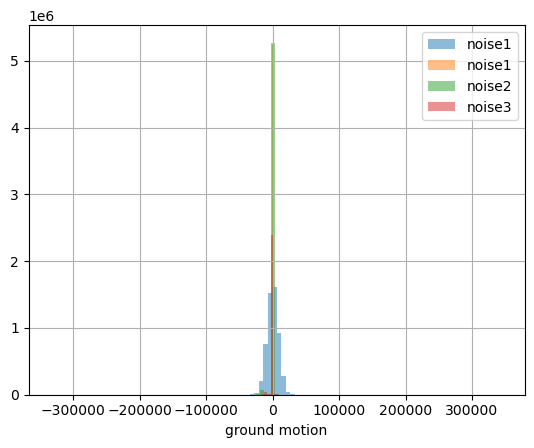

In [71]:
# type below
pt=plt.hist(m,100,alpha=0.5,label='noise1');
pt1=plt.hist(m1,100,alpha=0.5,label='noise1');
pt2=plt.hist(m2,100,alpha=0.5,label='noise2');
pt2=plt.hist(m3,100,alpha=0.5,label='noise3');
plt.legend();
plt.grid(True);
plt.xlabel('ground motion');
plt.show()

In [72]:
mc=m[0:594969]
tc=t[0:594969]

mc1=m1[0:594969]
tc1=t1[0:594969]

mc2=m2[0:594969]
tc2=t2[0:594969]

mc3=m3[0:594969]
tc3=t3[0:594969]

Text(0, 0.5, 'Counts')

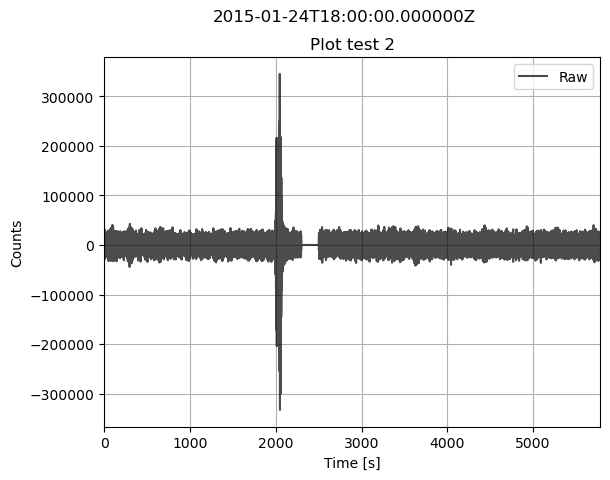

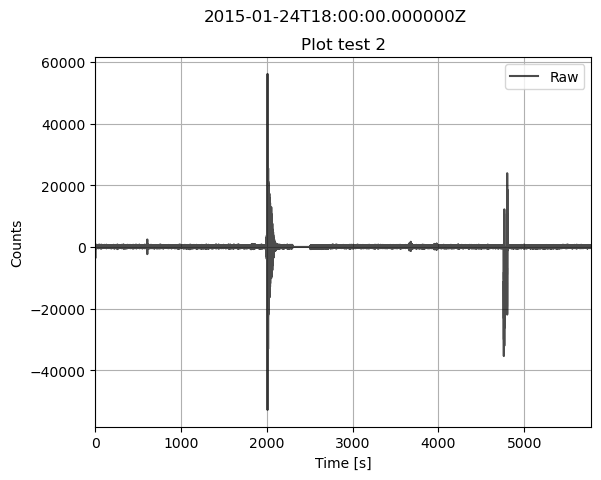

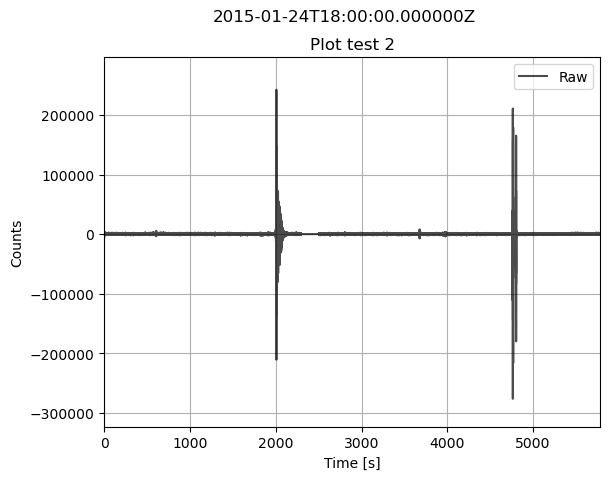

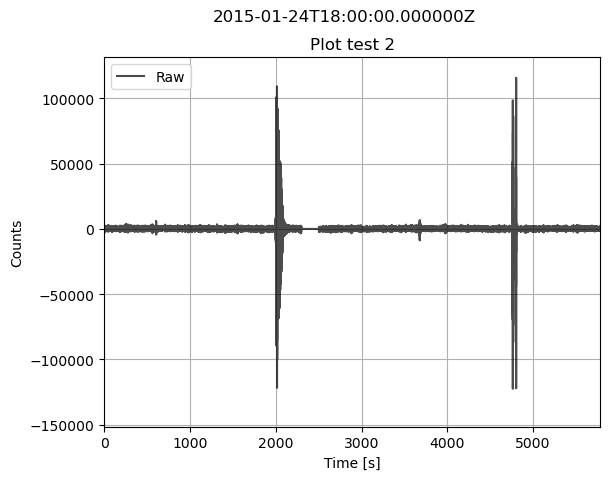

In [ ]:
plt.figure(1)
plt.plot(t, m ,'k', label='Raw', alpha=0.7)
plt.xlabel('Time [s]')
plt.xlim(0, 5781)
plt.suptitle(tr2.stats.starttime)
plt.grid(True)
plt.title('Plot test 2')
plt.legend()
plt.ylabel('Counts')

plt.figure(2)
plt.plot(t1, m1 ,'k', label='Raw', alpha=0.7)
plt.xlabel('Time [s]')
plt.xlim(0, 5781)
plt.suptitle(tr2.stats.starttime)
plt.grid(True)
plt.title('Plot test 2')
plt.legend()
plt.ylabel('Counts')

plt.figure(3)
plt.plot(t2, m2 ,'k', label='Raw', alpha=0.7)
plt.xlabel('Time [s]')
plt.xlim(0, 5781)
plt.suptitle(tr2.stats.starttime)
plt.grid(True)
plt.title('Plot test 2')
plt.legend()
plt.ylabel('Counts')

plt.figure(4)
plt.plot(t3, m3 ,'k', label='Raw', alpha=0.7)
plt.xlabel('Time [s]')
plt.xlim(0, 5781)
plt.suptitle(tr2.stats.starttime)
plt.grid(True)
plt.title('Plot test 2')
plt.legend()
plt.ylabel('Counts')

In [73]:
a=574069
b=51636

m[a:a+b]=0
m1[a:a+b]=0
m2[a:a+b]=0
m3[a:a+b]=0

m[1148138:1199774]=0
m1[1148138:1199774]=0
m2[1148138:1199774]=0
m3[1148138:1199774]=0

print(625705-574069)
print(574069+574069)
print(1148138+51636)


51636
1148138
1199774


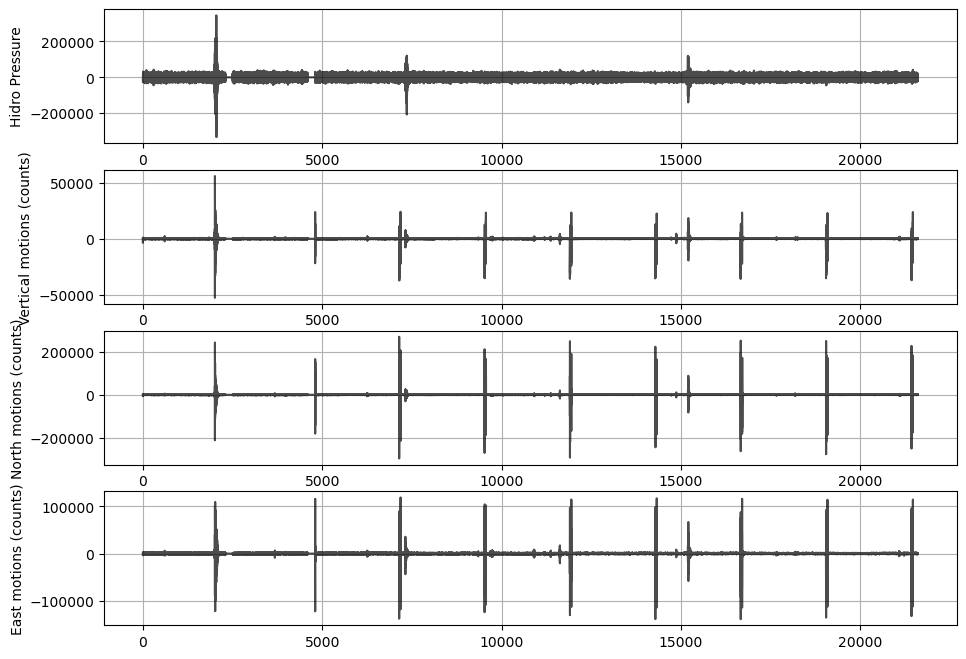

In [ ]:
fig1,ax=plt.subplots(4,1,figsize=(11,8))
ax[0].plot(t, m ,'k', label='Hidro', alpha=0.7)
ax[0].set_ylabel('Hidro Pressure')
ax[0].grid(True)
ax[1].plot(t1, m1 ,'k', label='Raw1', alpha=0.7)
ax[1].set_ylabel('Vertical motions (counts)')
ax[1].grid(True)
ax[2].plot(t2, m2 ,'k', label='Raw2', alpha=0.7)
ax[2].set_ylabel('North motions (counts)')
ax[2].grid(True)
ax[3].plot(t3, m3 ,'k', label='Raw3', alpha=0.7)
ax[3].set_ylabel('East motions (counts)')
ax[3].grid(True)

In [80]:
#m[0]= None
for i in range (len(m)):
    if abs(m[i])> 50000:
        m[i]= None

In [81]:
for i in range (len(m)):
    if abs(m1[i])> 1500:
        m1[i]= None

Text(0, 0.5, 'Counts')

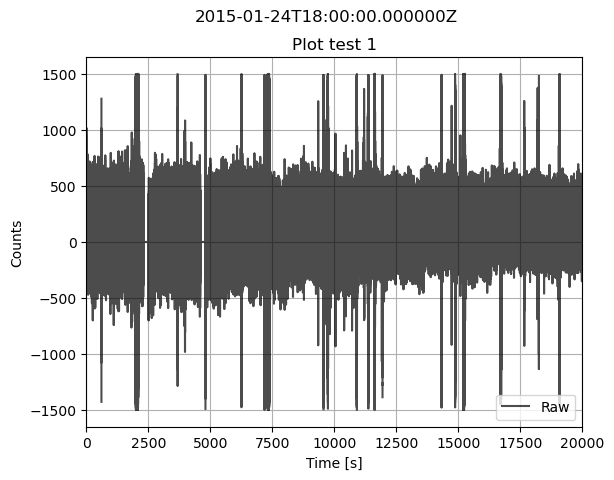

In [82]:
plt.figure(1)
plt.plot(t1, m1 ,'k', label='Raw', alpha=0.7)
plt.xlabel('Time [s]')
plt.xlim(0, 20000)
plt.suptitle(tr1.stats.starttime)
plt.grid(True)
plt.title('Plot test 1')
plt.legend()
plt.ylabel('Counts')

In [98]:
X = np.vstack([n1,n2,n3]).transpose()
Xe = X[:,1]
Xi=Xe[1218:29300]
ti=t[1218:29300]
#print (Xi)

c:\Users\jepul\anaconda3\envs\seisgo\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


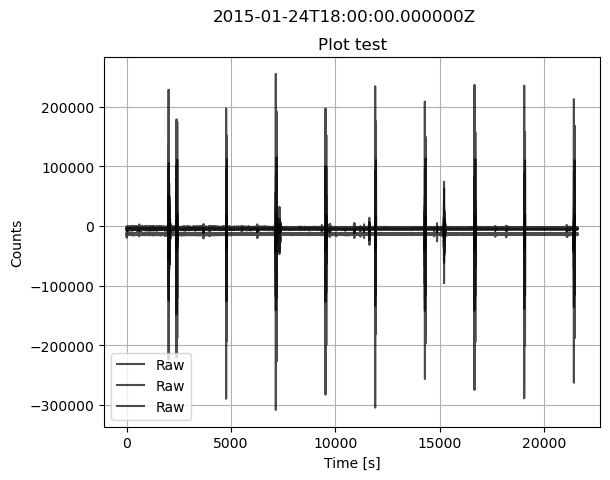

In [99]:
plt.plot(t1, X ,'k', label='Raw', alpha=0.7)
plt.xlabel('Time [s]')
#plt.xlim(0, 153)
plt.suptitle(tr.stats.starttime)
plt.grid(True)
plt.title('Plot test')
plt.legend()
plt.ylabel('Counts')
plt.show()

In [101]:
print(n1.shape)
print(X.shape)

(5400000,)
(5400000, 3)


In [102]:
#PCA for reveal the true movemento of the station 

from sklearn.decomposition import PCA
pca=PCA(n_components=3).fit(X)# retain all 3 components
print(pca)
# The 3 PCs
print(pca.components_)

PCA(n_components=3)
[[-0.26697447 -0.86194158 -0.4310236 ]
 [ 0.23277051 -0.49168994  0.83908217]
 [-0.93516978  0.12368393  0.33190325]]


In [103]:
# The 3 PCs' explained variance
print(pca.explained_variance_)

[18520053.76226579  4621172.79433013  1098408.6406428 ]


[0.76404012 0.19064531 0.04531457]


Text(0.5, 1.0, 'Variance explained with cumulated PCs')

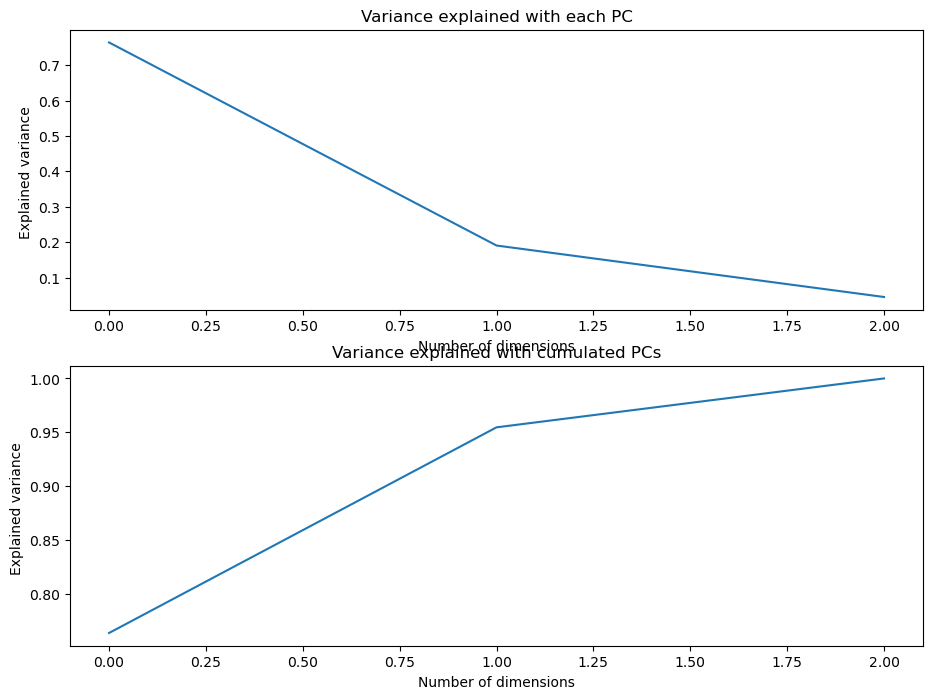

In [104]:
# The 3 PCs' explained variance ratio: how much of the variance is explained by each component
print(pca.explained_variance_ratio_)
fig,ax=plt.subplots(2,1,figsize=(11,8))
ax[0].plot(pca.explained_variance_ratio_)
ax[0].set_xlabel('Number of dimensions')
ax[0].set_ylabel('Explained variance ')
ax[0].set_title('Variance explained with each PC')
ax[1].plot(np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Number of dimensions')
ax[1].set_ylabel('Explained variance ')
ax[1].set_title('Variance explained with cumulated PCs')

In [105]:
d = np.argmax(np.cumsum(pca.explained_variance_ratio_)>=0.95) +1
print("minimum dimension size to explain 95% of the variance ",d)

minimum dimension size to explain 95% of the variance  2


In [106]:
pca = PCA(n_components=d).fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (5400000, 3)
transformed shape: (5400000, 2)


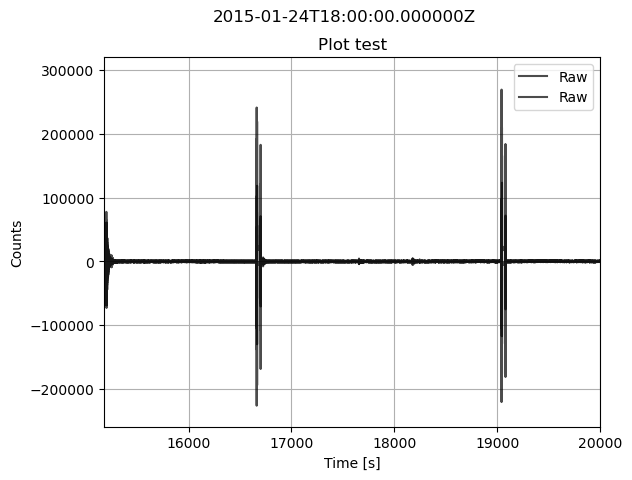

In [108]:
plt.plot(t1, X_pca ,'k', label='Raw', alpha=0.7)
plt.xlabel('Time [s]')
plt.xlim(15180, 20000)
plt.suptitle(tr.stats.starttime)
plt.grid(True)
plt.title('Plot test')
plt.legend()
plt.ylabel('Counts')
plt.show()

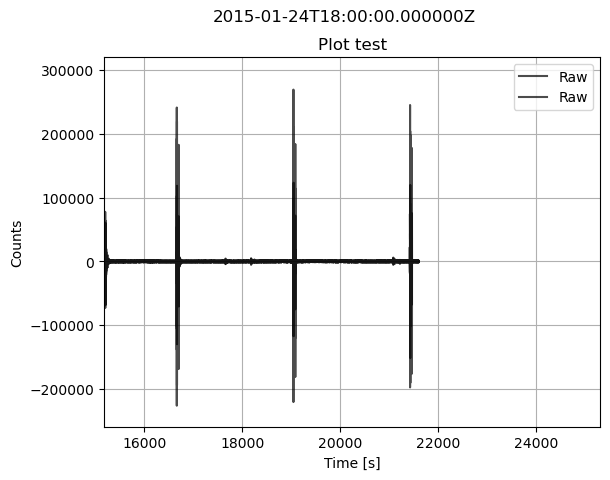

In [109]:
plt.plot(t1, X_pca ,'k', label='Raw', alpha=0.7)
plt.xlabel('Time [s]')
plt.xlim(15180, 25300)
plt.suptitle(tr.stats.starttime)
plt.grid(True)
plt.title('Plot test')
plt.legend()
plt.ylabel('Counts')
plt.show()

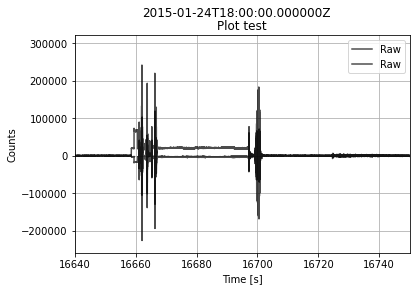

In [80]:
plt.plot(t, X_pca ,'k', label='Raw', alpha=0.7)
plt.xlabel('Time [s]')
#plt.xlim(15180, 15300)
plt.xlim(16640, 16750)
plt.suptitle(tr.stats.starttime)
plt.grid(True)
plt.title('Plot test')
plt.legend()
plt.ylabel('Counts')
plt.show()

In [110]:
npts = tr.stats.npts
print(tr.stats.delta)
print(tr.stats.delta)
delta = tr.stats.delta
print(X_pca[:,0].shape)
print(tr.data.shape)


0.004
0.004
(5400000,)
(5400000,)


In [111]:
from scipy.fftpack import fft, ifft, fftfreq, next_fast_len
npts = len(X_pca)
## FFT the signals
# fill up until 2^N value to speed up the FFT
Nfft = next_fast_len(int(X_pca.data.shape[0])) # this will be an even number
freqVec = fftfreq(Nfft, d=delta)[:Nfft//2]
Zhat = fft(X_pca[:,0],n=Nfft)#/np.sqrt(Z[0].stats.npts)


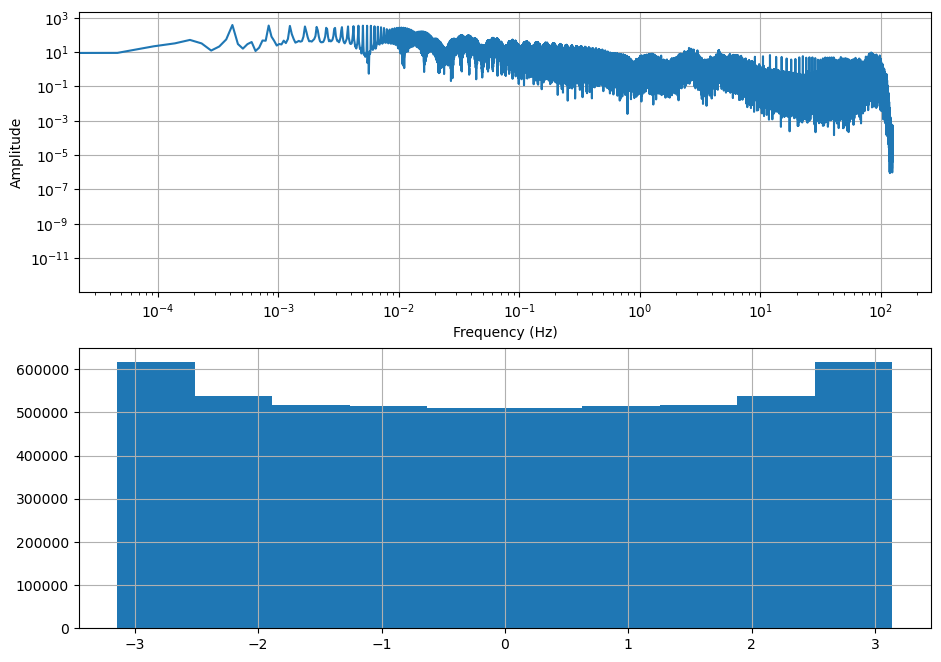

In [112]:
fig,ax=plt.subplots(2,1,figsize=(11,8))
ax[0].plot(freqVec,np.abs(Zhat[:Nfft//2])/Nfft)
ax[0].grid(True)
ax[0].set_xscale('log');ax[0].set_yscale('log')
ax[0].set_xlabel('Frequency (Hz)');ax[0].set_ylabel('Amplitude')
ax[1].hist(np.angle(Zhat))
ax[1].grid(True)
#weich method obspy


In [113]:
from scipy.signal import stft

stft()

TypeError: stft() missing 1 required positional argument: 'x'

In [114]:
from scipy.signal import stft

nperseg=25000
f, t, Zxx = stft(n1, fs=250, nperseg=nperseg,noverlap=nperseg/2 )
print(np.max(np.max(np.abs(Zxx))))
fig,ax=plt.subplots(1,1,figsize=(11,8),sharex=True)
ax.pcolormesh(t/3600, f, np.log10(np.abs(Zxx)), vmin=-1, vmax=3.5, shading='gouraud')
ax.set_title('STFT Magnitude')
ax.set_ylabel('Frequency [Hz]')
# ax[0].set_xlabel('Time [Hours]')
ax.set_yscale('log')
ax.set_ylim(0.01,40)

12610.390372265661


(0.01, 40)

In [18]:
#SVD
u,s,vh = np.linalg.svd(X, full_matrices=True)

MemoryError: Unable to allocate 212. TiB for an array with shape (5400000, 5400000) and data type float64

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
v= pca.components_[0,:] * 3 * pca.explained_variance_[0]
print(pca.mean_[:-1])
print(v[0])
draw_vector(pca.mean_[:-1], pca.mean_[:-1] + v[0])
plt.axis('equal');

direction of the plate  197.20964344992169  degrees from North


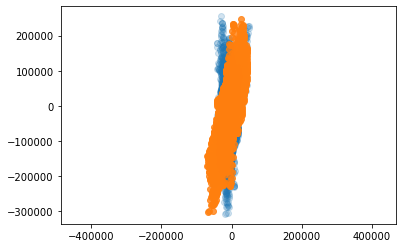

In [109]:
# Find the azimuth of the displacement vector
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

# Print out the azimuth and norm 
import math
a=math.degrees(math.atan2(pca.components_[0][0],pca.components_[0][1]))
if a <0:a+=360
print("direction of the plate ",a," degrees from North")

Text(0.5, 0, 'Vertical motions (mm)')

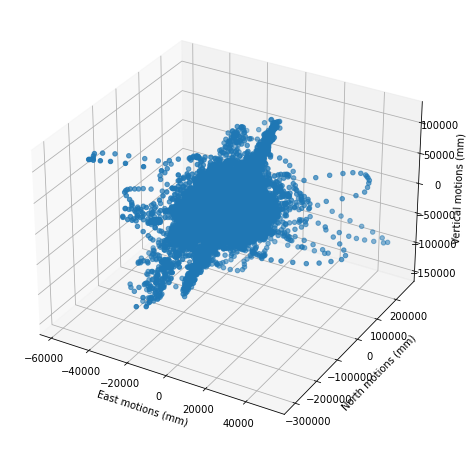

In [50]:
fig=plt.figure(figsize=(11,8))
ax=fig.add_subplot(projection='3d')
# viridis = cm.get_cmap('viridis', len(E))
# print(viridis)
# ax.scatter(E,N,U,cmap=viridis,norm=True);ax.grid(True)
ax.scatter(n1,n2,n3);ax.grid(True)
ax.set_xlabel('East motions (mm)')
ax.set_ylabel('North motions (mm)')
ax.set_zlabel('Vertical motions (mm)')